# Proyecto 1 - limpieza de datos

Autores:

* Alejandro Pacheco
* Laura Martinez
* Juan Carlos Marín
* Ignacio Neves
* Luisa Correa
* Rafael Figueredo

## Librerias

Inicialmente, importamos las librerias con las que se planea trabajar, para entender los datos y como trabajarlos.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Lectura del dataframe

Utilizamos la libreria Pandas para leer el dataset, y realizaremos un sampleo de 10 datos, el caual nos permite identificar columnas que cuentan con la misma información.

A continuación, utilizaremos el metodo **set_index()** para cambiar establecer la columna "Unnamed: 0" como el indice del dataframe.

In [60]:
data = pd.read_csv('../data/properatti.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [38]:
data.sample(10)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
54623,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6254804,-58.4516687",-34.625480,-58.451669,...,40.0,2887.500000,2887.500000,3.0,NaN,NaN,http://www.properati.com.ar/19nct_venta_depart...,VENTA DEPARTAMENTO 1 Y 1/2 AMBIENTES CABALLITO...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/SKOV23p_gJ3X1F...
84528,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,NaN,...,60.0,NaN,26741.666667,NaN,NaN,NaN,http://www.properati.com.ar/1b1ts_venta_depart...,2 dormitorios al frente en construcción con pr...,Departamento - Rosario,https://thumbs4.properati.com/4/aPov2b3WjZjTjp...
1707,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.46538925,-58.64939117",-34.465389,-58.649391,...,220.0,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/15jaf_venta_casa_t...,Zona:Residencial-Asfalto-Obra sanitaria:Pozo-P...,U$D 190.000 - Casa en Venta - C Belgrano 1834,https://thumbs4.properati.com/1/fmvlPbmy7tYCey...
26581,sell,apartment,Boedo,|Argentina|Capital Federal|Boedo|,Argentina,Capital Federal,3436003.0,"-34.6222039,-58.416089",-34.622204,-58.416089,...,32.0,24375.000000,24375.000000,NaN,1.0,NaN,http://www.properati.com.ar/17r9f_venta_depart...,Departamento 1 ambiente divisible con balconD...,Depa 1 amb y medio en cuotas de $ 11.000-,https://thumbs4.properati.com/0/4ntAWqUvQeNA1R...
76573,sell,house,City Bell,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Cit...,Argentina,Bs.As. G.B.A. Zona Sur,3435379.0,NaN,NaN,NaN,...,415.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1arre_venta_casa_c...,Excelente casa sobre lote de 1004 m2 con un fr...,Casa en Venta en City Bell Barrio Cerrado Loma...,https://thumbs4.properati.com/1/IOGVIfJ2zC33YZ...
19968,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4226185,-64.1567069",-31.422618,-64.156707,...,111.0,NaN,1216.216216,NaN,3.0,NaN,http://www.properati.com.ar/17b6r_venta_casa_c...,Casa en Venta de 3 dorm. en Cordoba,SAN VICENTE DOS DEPTOS. + DOS LOCALES,https://thumbs4.properati.com/3/OAKHBUzd2Kbo4t...
32441,sell,house,Country San Jorge Village,|Argentina|Bs.As. G.B.A. Zona Norte|Malvinas A...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4850031,-58.685939",-34.485003,-58.685939,...,430.0,1348.837209,1348.837209,NaN,NaN,NaN,http://www.properati.com.ar/1870i_venta_casa_c...,"Sobre lote de 1523 m2, propiedad de 430 m2 apr...",Casa en venta en San Jorge Village. ¡Ambientes...,https://thumbs4.properati.com/3/wynCx_D1lcZYc3...
70741,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,NaN,...,185.0,1286.486486,1286.486486,NaN,NaN,NaN,http://www.properati.com.ar/1ajzs_venta_casa_e...,Casa ubicada en el Area 3. PB: Living comedor ...,"Casa en San Matias, Ing. Maschwitz, Escobar",https://thumbs4.properati.com/1/pnQXNHVAzOjU7t...
57791,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3932414,-58.64467621",-34.393241,-58.644676,...,84.0,2976.190476,2976.190476,NaN,3.0,NaN,http://www.properati.com.ar/19u4p_venta_depart...,Lindisimo departamento con vista al río y a la...,NORDELTA - PUERTO ESCONDIDO - QBAY YACHT 100,https://thumbs4.properati.com/3/arZerD3IryaPaZ...
2865,sell,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.66231537,-58.68119812",-34.662315,-58.681198,...,167.0,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/15kme_venta_casa_i...,CHALET ESTILO ALPINO EN ESQUINA S/LOTE 335 M2-...,U$D 180.000 - Tipo casa PH en Venta - Alvear ...,https://thumbs4.properati.com/3/PwLGq8dDlz0HOD...


### Forma del dataframe

Mediante la función **shape** conoceremos la dimensión del dataset, para darnos una primera idea de la totalidad de los datos.

In [39]:
## Forma del dataset

print(f'Las dimendiones del dataset son las siguientes: {data.shape}')

Las dimendiones del dataset son las siguientes: (121220, 25)


Las columnas del dataset son las siguientes:

In [10]:
data.columns.values.tolist()

['operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

A continuación, vamos a realizar un resumen general del los estadísticos básicos de las variables cuantitativas del dataset:

In [11]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [12]:
data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

## Missing values

In [15]:
pd.isnull(data).sum()/121220*100

operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000
image_thumbnail                2.567233


### Primeros pasos

Se verifica si efectivamente la columna "operation", cuenta unicamente con el dato "sell", mediante la utilización de Boolean indexing.

In [18]:
mask = data.operation != 'sell'

data[mask].values.tolist()

[]

Eliminando datos atípicos

In [78]:
# mask1 = data.surface_total_in_m2<= 150000

# mask2 = data.surface_covered_in_m2.isna() == True

# data2 = data[mask1 & mask2]


mask = data.surface_total_in_m2<= 15000
mask2 = data.surface_total_in_m2.isna() == True

data2 = data[mask2 | mask]
data2.shape




(121167, 25)

Al obtener una lista vacia, confirmamos que la columna tiene un único valor, por lo cual, procedemos a eliminarla.

### Gráficas

(array([8.7618e+04, 3.0000e+01, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.51020408e+00, 4.00001355e+05, 8.00001200e+05, 1.20000105e+06,
        1.60000089e+06, 2.00000074e+06, 2.40000058e+06, 2.80000043e+06,
        3.20000027e+06, 3.60000012e+06, 3.99999996e+06]),
 <BarContainer object of 10 artists>)

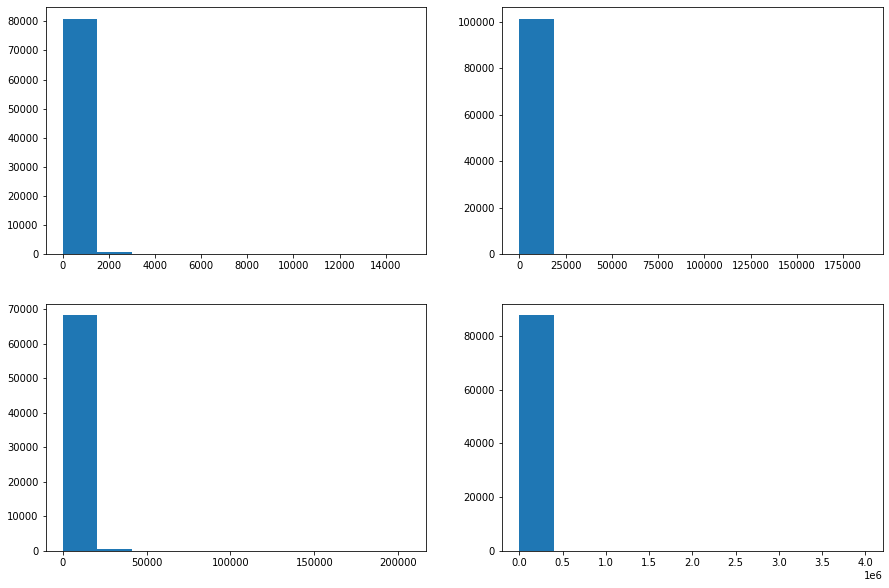

In [79]:
%matplotlib inline

n_bins = 10

fig, axs = plt.subplots(2,2, figsize = (15,10))
axs[0,0].hist(data2.surface_total_in_m2, bins = n_bins)
axs[0,1].hist(data.surface_covered_in_m2)
axs[1,0].hist(data.price_usd_per_m2)
axs[1,1].hist(data.price_per_m2)

In [80]:
data2.surface_total_in_m2.max()

15000.0

[(0.0, 1000.0)]

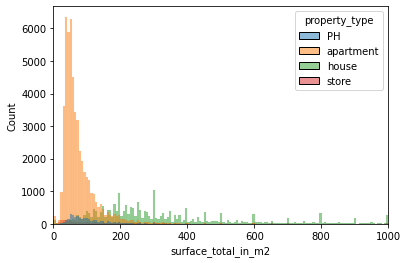

In [86]:
g = sns.histplot(data=data2, x = 'surface_total_in_m2', hue='property_type')
g.set(xlim = (0, 1000))